In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('C:\ExempleDataHL.xlsx')
df = df.dropna()


print("Taux de décès moyen :",df['Deces'].mean()) # Age de décès moyen sur l'ensemble des pathologies
print("Age Moyen :",df['Age_moyen'].mean())    # Age moyen sur l'ensemble des pathologies

Taux de décès moyen : 0.07347806004618936
Age Moyen : 76.22309468822169


In [2]:
d = df[df.Libelle.str.startswith('Sclérose')]
d

,Code,Libelle,Effectif,Duree_moy_sejour,Age_moyen,Sexe_ratio,Deces
23,01M173,"Sclérose en plaques et ataxie cérébelleuse, ni...",14,12.21,70.14,0.286,0.071


In [3]:
d['Deces'].mean()  # Age de décès moyen pour la sclérose en plaques

0.071

In [4]:
d['Age_moyen'].mean() # Age moyen pour la sclérose en plaques

70.14

In [5]:
df['Effectif'].sum() # Effectif total des pathologies


40257

In [6]:
tab = df.groupby(['Code','Libelle'])[['Age_moyen','Deces']].mean() # Age et pourcentage de décès moyen par pathologies
tab

,,Age_moyen,Deces
Code,Libelle,,
01M053,"Infections du système nerveux à l'exception des méningites virales, niveau 3",79.17,0.000
01M071,"Maladies dégénératives du système nerveux, âge supérieur à 79 ans, niveau 1",84.00,0.000
01M072,"Maladies dégénératives du système nerveux, âge supérieur à 79 ans, niveau 2",86.07,0.024
01M073,"Maladies dégénératives du système nerveux, âge supérieur à 79 ans, niveau 3",86.10,0.078
01M074,"Maladies dégénératives du système nerveux, âge supérieur à 79 ans, niveau 4",87.56,0.240
...,...,...,...
23M20Z,Autres symptômes et motifs de recours aux soins de la CMD 23,81.78,0.069
23Z02T,"Soins Palliatifs, avec ou sans acte, très courte durée",80.38,0.915
23Z02Z,"Soins Palliatifs, avec ou sans acte",77.67,0.682


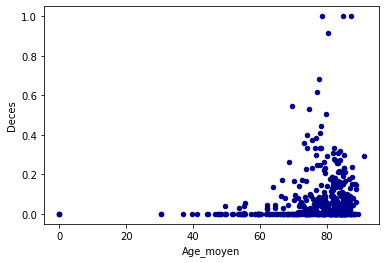

In [7]:
ax1 = tab.plot.scatter(x='Age_moyen',
                      y='Deces',
                      c='DarkBlue')

In [8]:
df2 = pd.read_excel('C:\ExempleDataCHUR.xlsx')
df2 = df2.dropna()
df2

,Code,Libelle,Effectif,Duree_sejour_moyen,Age_moyen,Sexe_ratio,Deces
0,01C031,"Craniotomies pour traumatisme, âge supérieur à...",632,4.30,60.71,0.761,0.127
1,01C032,"Craniotomies pour traumatisme, âge supérieur à...",1491,7.65,67.01,0.698,0.040
2,01C033,"Craniotomies pour traumatisme, âge supérieur à...",1294,14.36,69.74,0.656,0.072
3,01C034,"Craniotomies pour traumatisme, âge supérieur à...",1031,40.96,57.97,0.736,0.186
4,01C041,"Craniotomies en dehors de tout traumatisme, âg...",4803,5.27,55.95,0.486,0.027
...,...,...,...,...,...,...,...
2403,28Z21Z,Préparations à une irradiation externe avec do...,18,0.00,65.33,0.500,0.000
2404,28Z22Z,Autres préparations à une irradiation externe,656,0.00,67.79,0.299,0.000
2405,28Z23Z,Techniques complexes d'irradiation externe ave...,165608,0.00,62.11,0.265,0.000
2406,28Z24Z,Techniques complexes d'irradiation externe san...,18334,0.00,63.28,0.243,0.000


In [9]:
df_outer = pd.merge(df, df2, on='Code', how='inner')
df_outer

,Code,Libelle_x,Effectif_x,Duree_moy_sejour,Age_moyen_x,Sexe_ratio_x,Deces_x,Libelle_y,Effectif_y,Duree_sejour_moyen,Age_moyen_y,Sexe_ratio_y,Deces_y
0,01M053,Infections du système nerveux à l'exception de...,12,17.50,79.17,0.250,0.000,Infections du système nerveux à l'exception de...,1241,15.75,53.62,0.526,0.036
1,01M071,"Maladies dégénératives du système nerveux, âge...",14,12.71,84.00,0.571,0.000,"Maladies dégénératives du système nerveux, âge...",476,2.33,84.97,0.473,0.006
2,01M072,"Maladies dégénératives du système nerveux, âge...",83,13.58,86.07,0.470,0.024,"Maladies dégénératives du système nerveux, âge...",491,8.64,84.26,0.485,0.012
3,01M073,"Maladies dégénératives du système nerveux, âge...",141,16.62,86.10,0.468,0.078,"Maladies dégénératives du système nerveux, âge...",861,13.28,85.97,0.443,0.028
4,01M074,"Maladies dégénératives du système nerveux, âge...",25,17.08,87.56,0.520,0.240,"Maladies dégénératives du système nerveux, âge...",180,21.52,85.37,0.567,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,23M20Z,Autres symptômes et motifs de recours aux soin...,1100,17.37,81.78,0.407,0.069,Autres symptômes et motifs de recours aux soin...,35765,3.66,53.62,0.509,0.006
429,23Z02T,"Soins Palliatifs, avec ou sans acte, très cour...",47,0.00,80.38,0.809,0.915,"Soins Palliatifs, avec ou sans acte, très cour...",1006,0.00,58.84,0.560,0.220
430,23Z02Z,"Soins Palliatifs, avec ou sans acte",4540,19.94,77.67,0.515,0.682,"Soins Palliatifs, avec ou sans acte",14995,16.30,69.93,0.532,0.620
431,28Z14Z,"Transfusions, en séances",353,0.00,80.94,0.476,0.000,"Transfusions, en séances",70291,0.00,59.64,0.569,0.000


In [10]:
df_outer['Libelle_x'] # Pathologies communes des 2 fichiers

0      Infections du système nerveux à l'exception de...
1      Maladies dégénératives du système nerveux, âge...
2      Maladies dégénératives du système nerveux, âge...
3      Maladies dégénératives du système nerveux, âge...
4      Maladies dégénératives du système nerveux, âge...
                             ...                        
428    Autres symptômes et motifs de recours aux soin...
429    Soins Palliatifs, avec ou sans acte, très cour...
430                  Soins Palliatifs, avec ou sans acte
431                             Transfusions, en séances
432    Chimiothérapie pour affection non tumorale, en...
Name: Libelle_x, Length: 433, dtype: object

In [11]:
df3 = pd.read_excel('C:\CMD.xlsx',header=0,converters={'Code':str,'Libelle':str}) # Conversion du code en String
df3

,Code,Libelle
0,01,Affections du système nerveux
1,02,Affections de l’oeil
2,03,"Affections des oreilles, du nez, de la gorge, ..."
3,04,Affections de l'appareil respiratoire
4,05,Affections de l'appareil circulatoire
5,06,Affections du tube digestif
6,07,Affections du système hépatobiliaire et du pan...
7,08,Affections et traumatismes de l'appareil muscu...
8,09,"Affections de la peau, des tissus sous-cutanés..."
9,10,"Affections endocriniennes, métaboliques et nut..."


In [12]:
df2

,Code,Libelle,Effectif,Duree_sejour_moyen,Age_moyen,Sexe_ratio,Deces
0,01C031,"Craniotomies pour traumatisme, âge supérieur à...",632,4.30,60.71,0.761,0.127
1,01C032,"Craniotomies pour traumatisme, âge supérieur à...",1491,7.65,67.01,0.698,0.040
2,01C033,"Craniotomies pour traumatisme, âge supérieur à...",1294,14.36,69.74,0.656,0.072
3,01C034,"Craniotomies pour traumatisme, âge supérieur à...",1031,40.96,57.97,0.736,0.186
4,01C041,"Craniotomies en dehors de tout traumatisme, âg...",4803,5.27,55.95,0.486,0.027
...,...,...,...,...,...,...,...
2403,28Z21Z,Préparations à une irradiation externe avec do...,18,0.00,65.33,0.500,0.000
2404,28Z22Z,Autres préparations à une irradiation externe,656,0.00,67.79,0.299,0.000
2405,28Z23Z,Techniques complexes d'irradiation externe ave...,165608,0.00,62.11,0.265,0.000
2406,28Z24Z,Techniques complexes d'irradiation externe san...,18334,0.00,63.28,0.243,0.000


In [13]:
code = df3.loc[df3['Libelle'].str.match("Affections de l’oeil", na=False)].Code

affection_oeil = df2["Code"].str.startswith(code[1], na=False)
df2[affection_oeil].Libelle # Affichage des Libelle des affections de l'oeil

197          Interventions sur la rétine, en ambulatoire
198                Interventions sur la rétine, niveau 1
199                Interventions sur la rétine, niveau 2
200                Interventions sur la rétine, niveau 3
201                Interventions sur la rétine, niveau 4
                             ...                        
264    Autres affections oculaires d'origine non diab...
265    Autres affections oculaires d'origine non diab...
266    Explorations et surveillance pour affections d...
267    Symptômes et autres recours aux soins de la CM...
268    Symptômes et autres recours aux soins de la CM...
Name: Libelle, Length: 72, dtype: object

In [14]:
print("la durée de séjour moyenne est de :",df2[affection_oeil].Duree_sejour_moyen.mean())

la durée de séjour moyenne est de : 6.426111111111111


In [15]:
df

,Code,Libelle,Effectif,Duree_moy_sejour,Age_moyen,Sexe_ratio,Deces
0,01M053,Infections du système nerveux à l'exception de...,12,17.50,79.17,0.250,0.000
1,01M071,"Maladies dégénératives du système nerveux, âge...",14,12.71,84.00,0.571,0.000
2,01M072,"Maladies dégénératives du système nerveux, âge...",83,13.58,86.07,0.470,0.024
3,01M073,"Maladies dégénératives du système nerveux, âge...",141,16.62,86.10,0.468,0.078
4,01M074,"Maladies dégénératives du système nerveux, âge...",25,17.08,87.56,0.520,0.240
...,...,...,...,...,...,...,...
428,23M20Z,Autres symptômes et motifs de recours aux soin...,1100,17.37,81.78,0.407,0.069
429,23Z02T,"Soins Palliatifs, avec ou sans acte, très cour...",47,0.00,80.38,0.809,0.915
430,23Z02Z,"Soins Palliatifs, avec ou sans acte",4540,19.94,77.67,0.515,0.682
431,28Z14Z,"Transfusions, en séances",353,0.00,80.94,0.476,0.000
